<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id1='1gTfCTD3fz-3NJnfYLm59nZFN3WC3fzfD'
downloaded1 = drive.CreateFile({'id': id1})
downloaded1.GetContentFile('df_fe_without_preprocessing_train.csv')

id2='1JncN1Fyt-ND_yZXOzqEfcRsYMTKqtu7Q'
downloaded1 = drive.CreateFile({'id': id2})
downloaded1.GetContentFile('nlp_features_train.csv')

  
id3='10QDGTSI5PEV9e7CTpfzsXRpUwRIsJA-J'
downloaded1 = drive.CreateFile({'id': id3})
downloaded1.GetContentFile('train.csv')

In [9]:
df = pd.read_csv("train.csv")
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [0]:
df1 = dfnlp.drop(['qid1','qid2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df=pd.merge(df1,df2,on='id',how='left')

In [0]:

# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [16]:
df.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# merge texts
df_train,df_test=train_test_split(df,test_size=0.2)
#df_train,df_cv=train_test_split(df_train,test_size=0.2)

questions_tr = list(df_train['question1']) + list(df_train['question2'])
questions_te = list(df_test['question1']) + list(df_test['question2'])
#questions_cv = list(df_cv['question1']) + list(df_cv['question2'])

tfidf = TfidfVectorizer(min_df=50,lowercase=False, )
q_tr = tfidf.fit_transform(df_train['question1'])
q_te = tfidf.transform(df_test['question1'])
#q_cv = tfidf.transform(df_cv['question1'])

tfidf = TfidfVectorizer(min_df=50,lowercase=False, )
q_tr1 = tfidf.fit_transform(df_train['question2'])
q_te1 = tfidf.transform(df_test['question2'])
#q_cv1 = tfidf.transform(df_cv['question2'])


# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [47]:
q_tr

<258745x4086 sparse matrix of type '<class 'numpy.float64'>'
	with 2336545 stored elements in Compressed Sparse Row format>

In [48]:
df_train.columns

Index(['id', 'question1', 'question2', 'is_duplicate', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
       'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'longest_substr_ratio', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [57]:
from scipy.sparse import hstack

X_tr=hstack((q_tr,q_tr1,df_train['cwc_min'].values.reshape(-1,1),df_train['cwc_max'].values.reshape(-1,1),df_train['csc_min'].values.reshape(-1,1),
             df_train['csc_max'].values.reshape(-1,1),df_train['ctc_min'].values.reshape(-1,1),df_train['ctc_max'].values.reshape(-1,1),
             df_train['last_word_eq'].values.reshape(-1,1),
             df_train['first_word_eq'].values.reshape(-1,1),df_train['abs_len_diff'].values.reshape(-1,1),df_train['mean_len'].values.reshape(-1,1),
             df_train['token_set_ratio'].values.reshape(-1,1),df_train['token_sort_ratio'].values.reshape(-1,1),df_train['fuzz_ratio'].values.reshape(-1,1),
             df_train['fuzz_partial_ratio'].values.reshape(-1,1),df_train['longest_substr_ratio'].values.reshape(-1,1),df_train['freq_qid1'].values.reshape(-1,1),
             df_train['freq_qid2'].values.reshape(-1,1),df_train['q1len'].values.reshape(-1,1),df_train['q2len'].values.reshape(-1,1),
             df_train['q1_n_words'].values.reshape(-1,1),df_train['q2_n_words'].values.reshape(-1,1),df_train['word_Common'].values.reshape(-1,1),
             df_train['word_Total'].values.reshape(-1,1),df_train['word_share'].values.reshape(-1,1),
            df_train['freq_q1+q2'].values.reshape(-1,1),df_train['freq_q1-q2'].values.reshape(-1,1) ))


X_te=hstack((q_te,q_te1,df_test['cwc_min'].values.reshape(-1,1),df_test['cwc_max'].values.reshape(-1,1),df_test['csc_min'].values.reshape(-1,1),
             df_test['csc_max'].values.reshape(-1,1),df_test['ctc_min'].values.reshape(-1,1),df_test['ctc_max'].values.reshape(-1,1),
             df_test['last_word_eq'].values.reshape(-1,1),
             df_test['first_word_eq'].values.reshape(-1,1),df_test['abs_len_diff'].values.reshape(-1,1),df_test['mean_len'].values.reshape(-1,1),
             df_test['token_set_ratio'].values.reshape(-1,1),df_test['token_sort_ratio'].values.reshape(-1,1),df_test['fuzz_ratio'].values.reshape(-1,1),
             df_test['fuzz_partial_ratio'].values.reshape(-1,1),df_test['longest_substr_ratio'].values.reshape(-1,1),df_test['freq_qid1'].values.reshape(-1,1),
             df_test['freq_qid2'].values.reshape(-1,1),df_test['q1len'].values.reshape(-1,1),df_test['q2len'].values.reshape(-1,1),
             df_test['q1_n_words'].values.reshape(-1,1),df_test['q2_n_words'].values.reshape(-1,1),df_test['word_Common'].values.reshape(-1,1),
             df_test['word_Total'].values.reshape(-1,1),df_test['word_share'].values.reshape(-1,1),
            df_test['freq_q1+q2'].values.reshape(-1,1),df_test['freq_q1-q2'].values.reshape(-1,1) ))


'''X_cv=hstack((q_cv,q_cv1,df_cv['cwc_min'].values.reshape(-1,1),df_cv['cwc_max'].values.reshape(-1,1),df_cv['csc_min'].values.reshape(-1,1),
             df_cv['csc_max'].values.reshape(-1,1),df_cv['ctc_min'].values.reshape(-1,1),df_cv['ctc_max'].values.reshape(-1,1),
             df_cv['last_word_eq'].values.reshape(-1,1),
             df_cv['first_word_eq'].values.reshape(-1,1),df_cv['abs_len_diff'].values.reshape(-1,1),df_cv['mean_len'].values.reshape(-1,1),
             df_cv['token_set_ratio'].values.reshape(-1,1),df_cv['token_sort_ratio'].values.reshape(-1,1),df_cv['fuzz_ratio'].values.reshape(-1,1),
             df_cv['fuzz_partial_ratio'].values.reshape(-1,1),df_cv['longest_substr_ratio'].values.reshape(-1,1),df_cv['freq_qid1'].values.reshape(-1,1),
             df_cv['freq_qid2'].values.reshape(-1,1),df_cv['q1len'].values.reshape(-1,1),df_cv['q2len'].values.reshape(-1,1),
             df_cv['q1_n_words'].values.reshape(-1,1),df_cv['q2_n_words'].values.reshape(-1,1),df_cv['word_Common'].values.reshape(-1,1),
             df_cv['word_Total'].values.reshape(-1,1),df_cv['word_share'].values.reshape(-1,1),
            df_cv['freq_q1+q2'].values.reshape(-1,1),df_cv['freq_q1-q2'].values.reshape(-1,1) ))
'''

"X_cv=hstack((q_cv,q_cv1,df_cv['cwc_min'].values.reshape(-1,1),df_cv['cwc_max'].values.reshape(-1,1),df_cv['csc_min'].values.reshape(-1,1),\n             df_cv['csc_max'].values.reshape(-1,1),df_cv['ctc_min'].values.reshape(-1,1),df_cv['ctc_max'].values.reshape(-1,1),\n             df_cv['last_word_eq'].values.reshape(-1,1),\n             df_cv['first_word_eq'].values.reshape(-1,1),df_cv['abs_len_diff'].values.reshape(-1,1),df_cv['mean_len'].values.reshape(-1,1),\n             df_cv['token_set_ratio'].values.reshape(-1,1),df_cv['token_sort_ratio'].values.reshape(-1,1),df_cv['fuzz_ratio'].values.reshape(-1,1),\n             df_cv['fuzz_partial_ratio'].values.reshape(-1,1),df_cv['longest_substr_ratio'].values.reshape(-1,1),df_cv['freq_qid1'].values.reshape(-1,1),\n             df_cv['freq_qid2'].values.reshape(-1,1),df_cv['q1len'].values.reshape(-1,1),df_cv['q2len'].values.reshape(-1,1),\n             df_cv['q1_n_words'].values.reshape(-1,1),df_cv['q2_n_words'].values.reshape(-1,1),df_cv

In [0]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

<h3> SVM

For values of alpha =  1e-05 The log loss is: 0.4323692514779121
For values of alpha =  0.0001 The log loss is: 0.4437984028386029
For values of alpha =  0.001 The log loss is: 0.45509880299785344
For values of alpha =  0.01 The log loss is: 0.5200068012010357
For values of alpha =  0.1 The log loss is: 0.5045066433338876
For values of alpha =  1 The log loss is: 0.5770878901280396
For values of alpha =  10 The log loss is: 0.6304654915396319


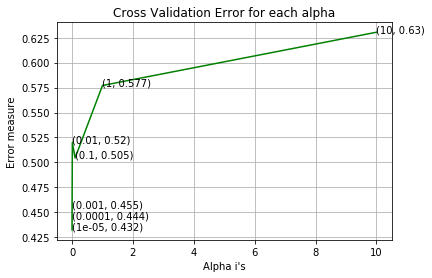

For values of best alpha =  1e-05 The train log loss is: 0.4297692487393058
For values of best alpha =  1e-05 The test log loss is: 0.4323692514779121
Total number of data points : 80858


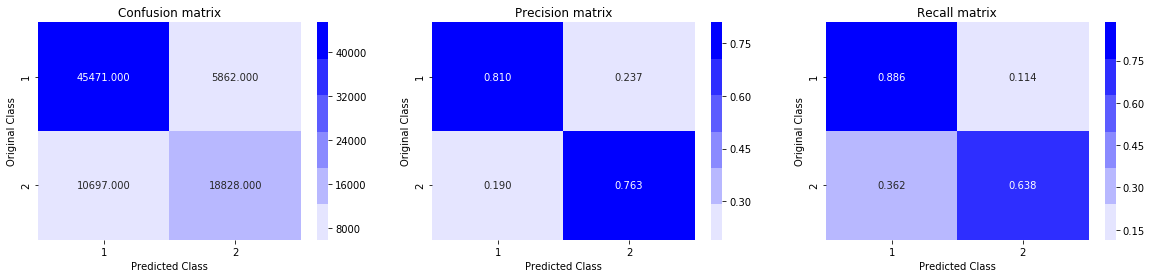

In [89]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    predict_y = sig_clf.predict_proba(X_te)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)


clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)

predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h3>LR

For values of alpha =  1e-05 The log loss is: 0.43570558551085664
For values of alpha =  0.0001 The log loss is: 0.45674323663911326
For values of alpha =  0.001 The log loss is: 0.46779149552751503
For values of alpha =  0.01 The log loss is: 0.513768705169717
For values of alpha =  0.1 The log loss is: 0.4849152464315826
For values of alpha =  1 The log loss is: 0.5629927748856669
For values of alpha =  10 The log loss is: 0.6278065992905404


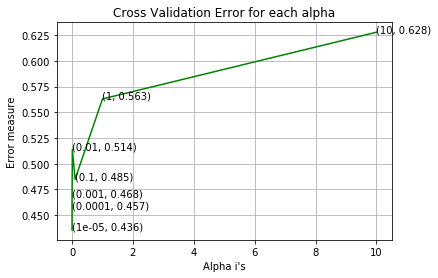

For values of best alpha =  1e-05 The train log loss is: 0.4332410448551336
For values of best alpha =  1e-05 The test log loss is: 0.43570558551085664
Total number of data points : 80858


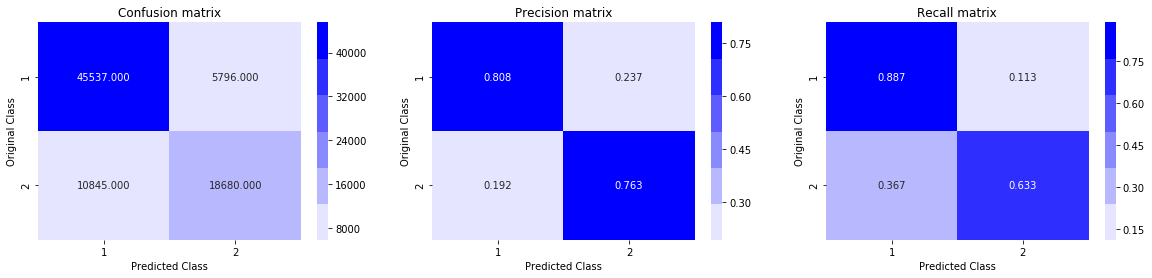

In [90]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    predict_y = sig_clf.predict_proba(X_te)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)


clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='log', random_state=42)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)

predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h3>XGBoost

In [64]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

y_train=df_train['is_duplicate']
y_test=df_test['is_duplicate']


x_cfl=xgb.XGBClassifier()

prams={
    'learning_rate':[0.01,0.1,0.2],
     'n_estimators':[100,500,1000],
     'max_depth':[3,5,8],
    'colsample_bytree':[0.1,0.5,1],
    'subsample':[0.1,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,scoring='neg_log_loss',cv=2,verbose=10,n_jobs=15)
random_cfl1.fit(X_tr,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   3 out of  20 | elapsed:  2.5min remaining: 14.2min
[Parallel(n_jobs=15)]: Done   6 out of  20 | elapsed: 22.6min remaining: 52.7min
[Parallel(n_jobs=15)]: Done   9 out of  20 | elapsed: 27.9min remaining: 34.1min
[Parallel(n_jobs=15)]: Done  12 out of  20 | elapsed: 30.7min remaining: 20.5min
[Parallel(n_jobs=15)]: Done  15 out of  20 | elapsed: 43.6min remaining: 14.5min
[Parallel(n_jobs=15)]: Done  18 out of  20 | elapsed: 53.5min remaining:  5.9min
[Parallel(n_jobs=15)]: Done  20 out of  20 | elapsed: 55.5min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [66]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.1}


In [0]:
from sklearn.calibration import CalibratedClassifierCV

cfl=xgb.XGBClassifier(n_estimators=1000,subsample=0.5,learning_rate=0.1,colsample_bytree=0.1,max_depth=8)
cfl.fit(X_tr,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_tr,y_train)

predict_y = c_cfl.predict_proba(X_tr)




In [77]:
print ('train loss',log_loss(y_train, predict_y))


predict_y = c_cfl.predict_proba(X_te)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.3669491681853815
test loss 0.3645488421244572


In [85]:
predicted_y

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

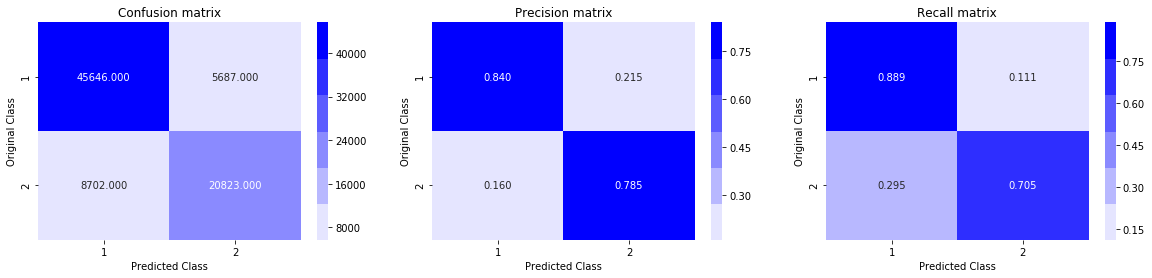

In [88]:
#y_test = list(map(int, y_test.values))
predicted_y =np.array(predict_y>0.5,dtype=int)
plot_confusion_matrix(y_test, predicted_y[:,1])

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h3>Conclusion

In [2]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Algorithm", "Train LogLoss", "Test LogLoss"]

x.add_row(["SVM", 0.4297692487393058,  0.4323692514779121])
x.add_row(["Logistic Regression", 0.4332410448551336, 0.43570558551085664])
x.add_row(["XGBoost", 0.3669491681853815, 0.3645488421244572])

print(x)

+---------------------+--------------------+---------------------+
|      Algorithm      |   Train LogLoss    |     Test LogLoss    |
+---------------------+--------------------+---------------------+
|         SVM         | 0.4297692487393058 |  0.4323692514779121 |
| Logistic Regression | 0.4332410448551336 | 0.43570558551085664 |
|       XGBoost       | 0.3669491681853815 |  0.3645488421244572 |
+---------------------+--------------------+---------------------+
